In [1]:
import time
import pandas as pd
import json as JSON
pd.options.mode.chained_assignment = None

## Data Import

In [2]:
dfile = pd.read_csv("dataset/Test Case Dataset.csv")
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,TEST STEPS,PRECEDENCE,COMPLEXITY,TEST DATA,EXPECTED RESULT,ACTUAL RESULT,PASS/FAIL
0,LOAD_001,Test Page load functionality through URL,None,Enter Invalid URL,H,8,NaN,NaN,NaN,NaN
1,LOAD_002,Test Page Reload without crashes,None,NaN,H,3,NaN,NaN,NaN,NaN
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,NaN,L,3,NaN,NaN,NaN,NaN
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,Choose city from name and icons,M,6,NaN,NaN,NaN,NaN
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,Choose city by Search Bar,M,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,NaN,M,4,NaN,NaN,NaN,NaN
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,NaN,H,10,NaN,NaN,NaN,NaN
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,NaN,H,6,NaN,NaN,NaN,NaN
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,NaN,H,7,NaN,NaN,NaN,NaN


## Data Pre-Processing

In [3]:
dfile = dfile.drop(["TEST STEPS","TEST DATA","EXPECTED RESULT", "ACTUAL RESULT", "PASS/FAIL"], axis = 1)

In [4]:
dummies = pd.get_dummies(dfile['PRECEDENCE'])
dfile = pd.concat([dfile, dummies], axis = 1)

In [5]:
PRE_CON_COUNT = [0]*dfile['TEST ID'].count()
dfile['PRE_CON_COUNT'] = PRE_CON_COUNT

In [6]:
dfile['PRE-CONDITIONS'].unique()

array(['None', 'LOAD_001', 'SELECT_CITY_001', 'SELECT_CITY_002',
       'SELECT_CITY_003', 'HOME_001', 'SIGN_IN_001', 'SIGN_UP_001',
       'SEARCHBAR_001', 'CATEGORY_001', 'RECOMMEND_001', 'MOVIE_LOAD_001',
       'BOOK_LOAD_001', 'SHOWTIME_001', 'SHOWTIME_002', 'SEATS_001',
       'SEATS_002', 'SEATS_003', 'PAY_BUTTON_001', 'PAY_BUTTON_002',
       'PAY_INIT_001', 'PAYMENT_OPT_003', 'MOB_WALLET_002', 'VOUCHER_003',
       'UPI_001', 'UPI_002', 'PAY_INIT_002', 'PAY_PORTAL_002',
       'PAY_PORTAL_003', 'CONFIRM_001', 'SESSION_002', 'SESSION_003',
       'SESSION_001', 'EVENT_DETAIL_001', 'EVENT_DETAIL_004',
       'BOOK_EVENT_001', 'BOOK_EVENT_003', 'BOOK_EVENT_004'], dtype=object)

In [7]:
def childPCC(this):
    if this in dfile['PRE-CONDITIONS'].values:
        return len(dfile.loc[dfile['PRE-CONDITIONS'] == this,'TEST ID'])
    else:
        return 0

In [8]:
for ids in dfile['TEST ID']:
    if ids in dfile['PRE-CONDITIONS'].values:
        dfile.loc[ dfile['TEST ID'] == ids, 'PRE_CON_COUNT' ]\
        = dfile.loc[ dfile['PRE-CONDITIONS'] == ids, 'TEST ID' ].count()
    
        for sub in list(dfile.loc[dfile['PRE-CONDITIONS'] == ids,'TEST ID']):
                dfile.loc[ dfile['TEST ID'] == ids,'PRE_CON_COUNT' ] += childPCC(sub)

In [9]:
dfile['PRE_CON_COUNT'].values

array([12,  0,  0,  1,  1,  1, 16,  0,  0,  0,  0,  6,  0,  0,  2,  0,  0,
        0,  5,  0,  0,  3,  0,  0,  0,  1,  0,  0,  3,  0,  0,  0,  3,  0,
        2,  3,  3,  2,  2,  0,  3, 13, 22,  0,  0,  0,  0,  0,  0, 15,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  2,  6,  4,  0,  0,  0,
        0,  0,  6,  0,  6,  8,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        2,  1,  0,  0,  4,  0,  0,  3,  3,  0,  2,  1,  0,  0,  0])

In [10]:
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,12
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1,1
...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,4,0,0,1,2
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,6,1,0,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,7,1,0,0,0


## 'WEIGHTAGE' column

In [11]:
weightage = [0]*dfile['TEST ID'].count()
dfile['WEIGHTAGE'] = weightage

In [12]:
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,12,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1,1,0


In [13]:
dfile['WEIGHTAGE'] = (\
        dfile['H'] * 0.9 + 
        dfile['M'] * 0.5 +
        dfile['L'] * 0.1 +
        (dfile['PRE_CON_COUNT'])\
    ) * (dfile['COMPLEXITY'])
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,12,103.2
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,2.7
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0.3
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1,1,9.0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1,1,7.5
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,4,0,0,1,2,10.0
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1,19.0
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,6,1,0,0,0,5.4
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,7,1,0,0,0,6.3


In [14]:
print(dfile['WEIGHTAGE'].max())

206.1


## Objective Function of the system

In [15]:
def objectiveFn(arguments):
    x1, x2, x3, x4, x5 = arguments
    
    if x2 == x3:
        x3 = 0
    if x1 == x2 or x1 == x3:
        x2 = x3 = 0
    if x3 > x1 and x3 > x2:
        x1 = x2 = 0
    if x2 > x1 and x2 > x3:
        x1 = x3 = 0
    if x1 > x2 and x1 > x3:
        x2 = x3 = 0

    return ( x1*0.9 + x2*0.5 + x3*0.1 + x4 ) * x5

In [16]:
maximumIterations = 50

## Best values from Particle Swarm Optimization

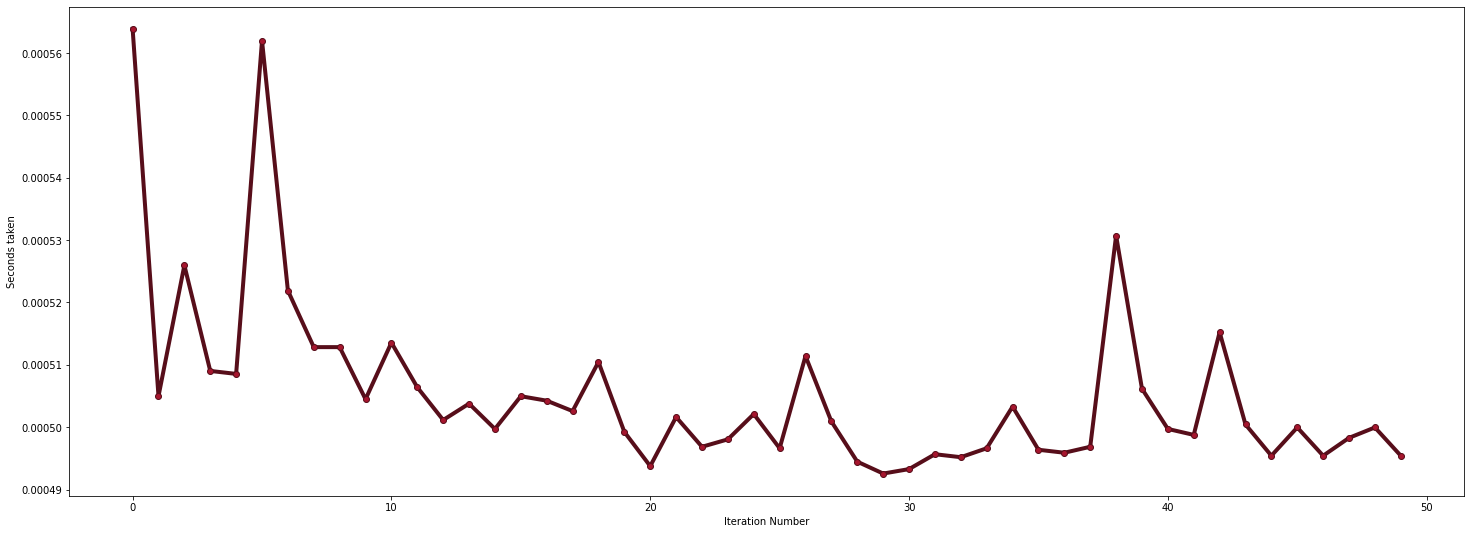

Best values of x: [ 1  1  1 22 10]
Best values of f(x): 229.0


In [17]:
from algo.PSO import PSO

pso_before = time.time()

instance = PSO(
    func = objectiveFn,
    dim = 5,
    pop = 100,
    lb = [0, 0, 0, dfile['PRE_CON_COUNT'].min(), dfile['COMPLEXITY'].min()],
    ub = [1, 1, 1, dfile['PRE_CON_COUNT'].max(), dfile['COMPLEXITY'].max()],
    w = 0.6,
    c1 = 0.7,
    c2 = 0.7
)
pso_result = instance.run(max_iter = maximumIterations)

pso_time = time.time() - pso_before

print("Best values of x: {}".format(pso_result.gbest_x))
print("Best values of f(x): {}".format(pso_result.gbest_y))

In [18]:
print("--- PSO took {} seconds ---".format(pso_time))

--- PSO took 0.37033796310424805 seconds ---


## PSO result

In [19]:
pso_dfile = dfile.copy()

In [20]:
pso_dfile['DIFF'] = abs( pso_result.gbest_y - pso_dfile['WEIGHTAGE'] )
pso_dfile.sort_values('DIFF', ascending = True, axis = 0, inplace = True)

In [21]:
pso_dfile = pso_dfile.drop(['H', 'L', 'M'], axis = 1)
pso_dfile = pso_dfile.reset_index(drop = True)

In [22]:
pso_dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,PRE_CON_COUNT,WEIGHTAGE,DIFF
0,PAY_INIT_001,Check load of Payment page,PAY_BUTTON_002,H,9,22,206.1,22.9
1,HOME_001,Test load of Home Page,LOAD_001,H,9,16,152.1,76.9
2,LOAD_001,Test Page load functionality through URL,None,H,8,12,103.2,125.8
3,PAY_PORTAL_003,Test redirect to Confirmation Page,PAY_PORTAL_002,H,8,8,71.2,157.8
4,PAY_PORTAL_002,Test Transaction confirmation,PAY_INIT_002,H,10,6,69.0,160.0
...,...,...,...,...,...,...,...,...
95,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,0.3,228.7
96,SHOWTIME_003,Test display of Showtime selected,PAY_INIT_001,L,2,0,0.2,228.8
97,LOGIN_003,Check switch to Login Button,SIGN_IN_001,L,2,0,0.2,228.8
98,HOME_005,Test Return to Home Page on Logo Click,HOME_001,L,2,0,0.2,228.8


## Best values from Genetic Algorithm

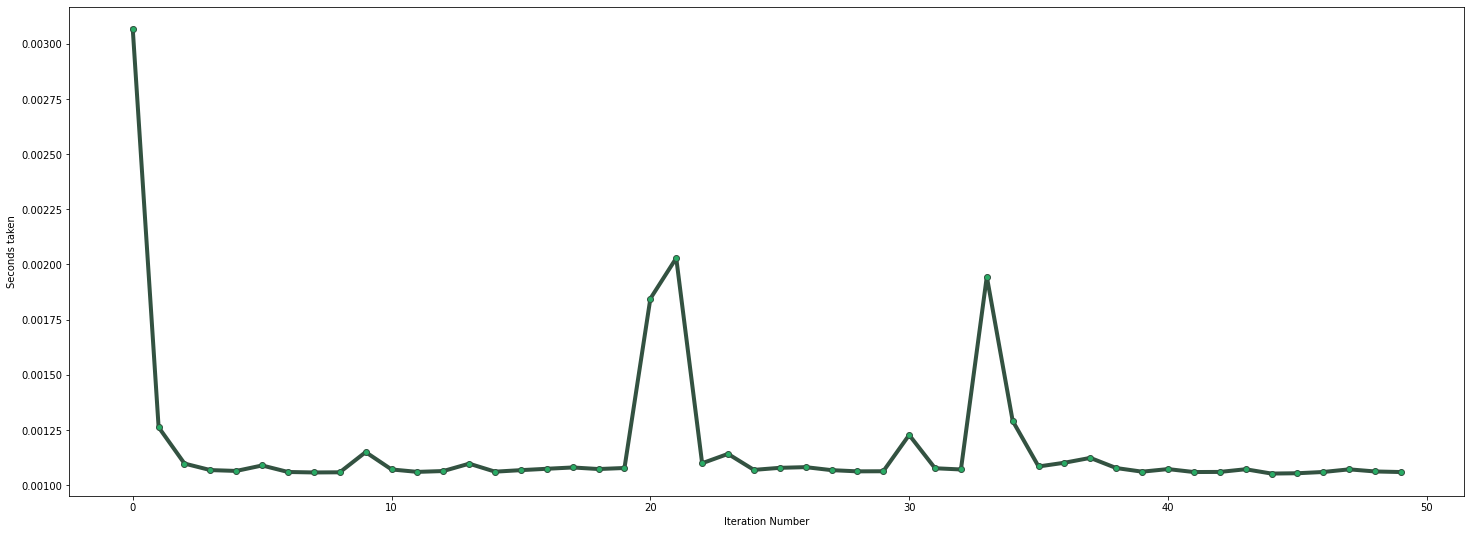

Best values for x: [ 0  1  1 22 10]
Best value for f(x): 220.0


In [23]:
from algo.GA import GeneticAlgorithm

ga_before = time.time()

ga = GeneticAlgorithm(
    fitness_function = objectiveFn,
    pop_size = 100,
    genome_length = 5,
    lb = [0, 0, 0, dfile['PRE_CON_COUNT'].min(), dfile['COMPLEXITY'].min()],
    ub = [1, 1, 1, dfile['PRE_CON_COUNT'].max(), dfile['COMPLEXITY'].max()]
)
ga.generate_binary_population()
ga.number_of_pairs = 4
ga.selective_pressure = 1.4
ga.mutation_rate = 0.2
ga.run(maximumIterations)

ga_time = time.time() - ga_before

best_genome, best_fitness = ga.get_best_genome()
print("Best values for x: {}".format(best_genome))
print("Best value for f(x): {}".format(best_fitness))

In [24]:
print("--- GA took {} seconds ---".format(ga_time))

--- GA took 0.38193488121032715 seconds ---


## GA result

In [25]:
ga_dfile = dfile.copy()

In [26]:
ga_dfile['DIFF'] = abs( best_fitness - ga_dfile['WEIGHTAGE'] )
ga_dfile.sort_values('DIFF', ascending = True, axis = 0, inplace = True)

In [27]:
ga_dfile = ga_dfile.drop(['H', 'L', 'M'], axis = 1)
ga_dfile = ga_dfile.reset_index(drop = True)

In [28]:
ga_dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,PRE_CON_COUNT,WEIGHTAGE,DIFF
0,PAY_INIT_001,Check load of Payment page,PAY_BUTTON_002,H,9,22,206.1,13.9
1,HOME_001,Test load of Home Page,LOAD_001,H,9,16,152.1,67.9
2,LOAD_001,Test Page load functionality through URL,None,H,8,12,103.2,116.8
3,PAY_PORTAL_003,Test redirect to Confirmation Page,PAY_PORTAL_002,H,8,8,71.2,148.8
4,PAY_PORTAL_002,Test Transaction confirmation,PAY_INIT_002,H,10,6,69.0,151.0
...,...,...,...,...,...,...,...,...
95,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,0.3,219.7
96,SHOWTIME_003,Test display of Showtime selected,PAY_INIT_001,L,2,0,0.2,219.8
97,LOGIN_003,Check switch to Login Button,SIGN_IN_001,L,2,0,0.2,219.8
98,HOME_005,Test Return to Home Page on Logo Click,HOME_001,L,2,0,0.2,219.8


## Comparative Study

In [29]:
equality = 1
for i in range( pso_dfile['TEST ID'].count() ):
    if pso_dfile['TEST ID'][i] != ga_dfile['TEST ID'][i]:
        print(\
              "Instances @ row {} are different: {} | {}"\
              .format(i, pso_dfile['TEST ID'][i], ga_dfile['TEST ID'][i])\
        )
        equality = 0
        break

In [30]:
customer_rank = pd.read_csv("dataset/Test Customer Ranking.csv")

In [31]:
pso_accuracy = 0
pso_error = 0

pso_accuracy= pso_dfile.loc[ pso_dfile['TEST ID'] == customer_rank['TEST ID'], 'TEST ID' ].count()
pso_accuracy= (pso_accuracy/pso_dfile['TEST ID'].count())*100

pso_error = 100 - pso_accuracy

print("PSO accuracy: {} %".format(pso_accuracy))
print("PSO error: {} %".format(pso_error))

PSO accuracy: 83.0 %
PSO error: 17.0 %


In [32]:
ga_accuracy = 0
gaError = 0

ga_accuracy = ga_dfile.loc[ ga_dfile['TEST ID'] == customer_rank['TEST ID'], 'TEST ID' ].count()
ga_accuracy = (ga_accuracy/ga_dfile['TEST ID'].count())*100

ga_error = 100 - ga_accuracy

print("GA accuracy: {} %".format(ga_accuracy))
print("GA error: {} %".format(ga_error))

GA accuracy: 83.0 %
GA error: 17.0 %


In [33]:
print("PSO execution time: {}".format(pso_time))
print("GA execution time: {}".format(ga_time))

PSO execution time: 0.37033796310424805
GA execution time: 0.38193488121032715


## Export results

In [34]:
pso_dfile.to_csv('result/PSO Result.csv', index = False, encoding = 'utf-8')
ga_dfile.to_csv('result/GA Result.csv', index = False, encoding = 'utf-8')

pso_dfile.to_csv('result/PSO Result.tsv', sep = "\t",index = False, encoding = 'utf-8')
ga_dfile.to_csv('result/GA Result.tsv', sep = "\t",index = False, encoding = 'utf-8')

In [35]:
result = {
    "PSO":{
        "x" : pso_result.gbest_x.tolist(),
        "f_x" : int(pso_result.gbest_y),
        "x_axis" : list(pso_result.xaxis),
        "y_axis" : list(pso_result.yaxis),
        "time" : float(pso_time),
        "accuracy" : pso_accuracy
    },
    "GA":{
        "x" : best_genome.tolist(),
        "f_x" : int(best_fitness),
        "x_axis" : list(ga.xaxis),
        "y_axis" : list(ga.yaxis),
        "time" : float(ga_time),
        "accuracy" : ga_accuracy
    },
    "equality": equality,
    "maximum_iterations": maximumIterations
}

with open('result/result.json', 'w') as File:
    JSON.dump(result, File, indent = 4)

In [36]:
File.close()

## Export to python script file

In [37]:
# Convert to python3 script file

!jupyter nbconvert --to script "Test Case Opt"

[NbConvertApp] Converting notebook Test Case Opt.ipynb to script
[NbConvertApp] Writing 6576 bytes to Test Case Opt.py
